In [1]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

mp_hands = mp.solutions.hands
mp_face_detection = mp.solutions.face_detection


In [1]:
IMAGE_FILES = [
    "./data/b/IMG_20230215_150701.jpg",
]


Handedness: [classification {
  index: 1
  score: 0.9974846243858337
  label: "Right"
}
, classification {
  index: 0
  score: 0.9908871054649353
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.7806299924850464
  y: 0.6751330494880676
  z: -5.577891215580166e-07
}
landmark {
  x: 0.6870737671852112
  y: 0.6711399555206299
  z: 0.024150127544999123
}
landmark {
  x: 0.6205622553825378
  y: 0.6284598112106323
  z: 0.03052876517176628
}
landmark {
  x: 0.5670197606086731
  y: 0.6058595180511475
  z: 0.024260496720671654
}
landmark {
  x: 0.5176154375076294
  y: 0.5833701491355896
  z: 0.017962053418159485
}
landmark {
  x: 0.6815142035484314
  y: 0.5165618062019348
  z: 0.06689643859863281
}
landmark {
  x: 0.6072274446487427
  y: 0.5047447085380554
  z: 0.059026896953582764
}
landmark {
  x: 0.555191695690155
  y: 0.5203120112419128
  z: 0.04127098247408867
}
landmark {
  x: 0.5178897380828857
  y: 0.5411336421966553
  z: 0.02880181185901165
}
landmark {
  x: 0.7005058526992798
  y

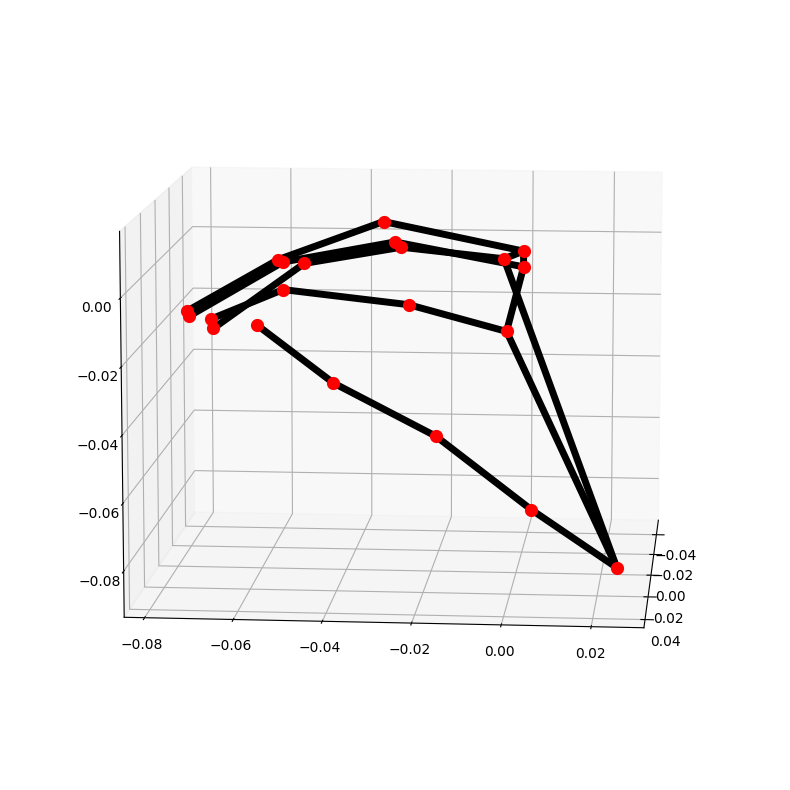

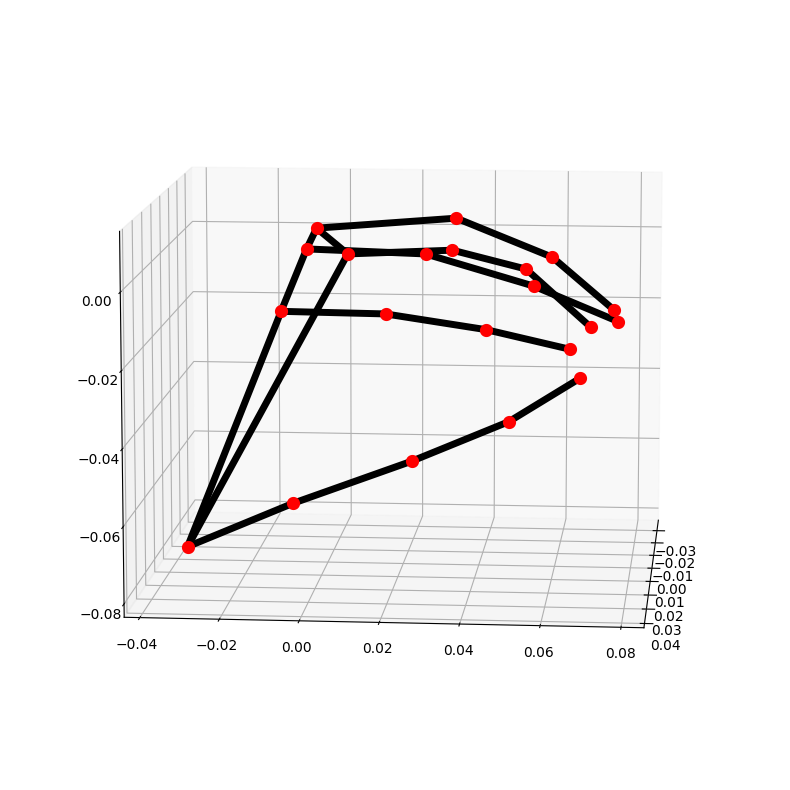

In [5]:
with mp_hands.Hands(
    static_image_mode=True, max_num_hands=2, min_tracking_confidence=0.4
) as hands:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.flip(cv2.imread(file), 1)
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        print("Handedness:", results.multi_handedness)
        if not results.multi_hand_landmarks:
            continue

        image_height, image_width, _ = image.shape
        annotated_image = image.copy()
        for hand_landmarks in results.multi_hand_landmarks:
            print("hand_landmarks:", hand_landmarks)
            print(
                f"Index finger tip coordinates: (",
                f"{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, "
                f"{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})",
            )
            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style(),
            )
        cv2.imwrite(
            "/tmp/annotated_image" + str(idx) + ".png", cv2.flip(annotated_image, 1)
        )
        # Draw hand world landmarks.
        if not results.multi_hand_world_landmarks:
            continue
        for hand_world_landmarks in results.multi_hand_world_landmarks:
            mp_drawing.plot_landmarks(
                hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5
            )
